In [1]:
from Continuous_Acquisition import ACQUISITION_CONFIG
import sys
import time
sys.path.append(r'C:\Users\kid\SynologyDrive\Lab2023\KIDs\QTLab2324\IR_SING_PHOT\Synth')
sys.path.append(r'C:\Users\kid\SynologyDrive\Lab2023\KIDs\QTLab2324\IR_SING_PHOT\Exceptions')
sys.path.append(r'C:\Users\kid\SynologyDrive\Lab2023\KIDs\QTLab2324\IR_SING_PHOT\DAQ')
import Synthesizer
from logs.logging_config import LOGGING_CONFIG
from logging.config import dictConfig
import logging
import json
from Exceptions import replace_non_serializable
import DAQ
import niscope as ni
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filepath = r'C:\Users\kid\SynologyDrive\Lab2023\KIDs\QTLab2324\IR_SING_PHOT\API'

In [3]:
dictConfig(LOGGING_CONFIG)
logger = logging.getLogger(__name__)
logger.info('START EXECUTION')

19:33:46.960 - __main__ - <module> - INFO - START EXECUTION


In [4]:
try:
    cfg1 = json.dumps(replace_non_serializable(ACQUISITION_CONFIG))
    logger.info('Dumping acquisition configuration')
    with open(ACQUISITION_CONFIG['acq_conf']['path'] + 'config.json','w') as f:
        f.write(cfg1)
except Exception:
    logger.critical('Dumping acquisition configuration')
    raise SystemError("Could not dump acquisition configuration!")

19:33:47.246 - __main__ - <module> - INFO - Dumping acquisition configuration


In [5]:
try:
    daq = DAQ.DAQ()
    logger.info('DAQ class object correctly created')
except Exception:
    logger.critical('Could not crate DAQ class object')
    raise SyntaxError('Could not create DAQ class object')

19:33:47.913 - __main__ - <module> - INFO - DAQ class object correctly created


In [6]:
channels = {'I'			: 0, 
            'Q'			: 3,
            'trigger'	: 3}

In [7]:
devicename =  'PXI1Slot4'

In [8]:
try:
    daq.reset_with_def()
    daq.get_status
    logger.info('Resetting DAQ with defaults')
except Exception:
    logger.error('Could not reset DAQ with defaults')
    pass

19:33:49.296 - __main__ - <module> - ERROR - Could not reset DAQ with defaults


In [9]:
try:
    daq.acq_conf = ACQUISITION_CONFIG['acq_conf']
    logger.info('Inserting acquisition configuration from ACQUISITION_CONFIG dictionary')
except Exception:
    logger.warning('Coulkd not insert acquisition configuration')
    raise SystemError('Coulkd not insert acquisition configuration')

19:33:49.788 - __main__ - <module> - INFO - Inserting acquisition configuration from ACQUISITION_CONFIG dictionary


In [10]:
try:
    daq.horizontal_conf = ACQUISITION_CONFIG['horizontal']
    logger.info('Inserting hconf dic')
except Exception:
    logger.warning('Could not insert hconf dic')
    raise SystemError('Could not insert hconf dic')

19:33:50.067 - __main__ - <module> - INFO - Inserting hconf dic


In [11]:
try:
    daq.vertical_conf = ACQUISITION_CONFIG['vertical']
    logger.info('Inserting vconf dic')
except Exception:
    logger.warning('Could not insert vconf dic')
    raise SystemError('Could not insert vconf dic')

19:33:50.358 - __main__ - <module> - INFO - Inserting vconf dic


In [12]:
try:
    daq.chan_conf = ACQUISITION_CONFIG['chan_conf']
    logger.info('Inserting chan char dic')
except Exception:
    logger.warning('Could not insert chan char dic')
    raise SystemError('Could not insert chan char dic')

19:33:50.745 - __main__ - <module> - INFO - Inserting chan char dic


In [13]:
try:
    daq.trigger_dic = ACQUISITION_CONFIG['trigger']
    logger.info('Inserting trigger dic')
except Exception:
    logger.warning('Could not insert trigger dic')
    raise SystemError('Could not insert trigger dic')

19:33:51.044 - __main__ - <module> - INFO - Inserting trigger dic


In [14]:
s1 = Synthesizer.Synthesizer(1)
s1.connettore()

Synth_uno!
Si è connessi al synth_uno!


In [15]:
f0 = 5.345215443088618
span = 1e-2
fs = np.linspace(f0-span,f0+span,1000)

In [16]:
s1.outp_frequency_on()

In [17]:
s1.set_frequency(f0)

In [18]:
data = {'CH0': [],
        'CH3': []   
                }

In [30]:
daq._session = ni.Session(devicename)
daq.config_trigger()
with daq._session as session:
    daq.configure_channels()
    for i,f in enumerate(fs):
        s1.set_frequency(f) # set frequency
        time.sleep(0.1)
        if i%10==0: print(str(i)+'\t'+str(s1.get_frequency()))
        daq._session.initiate()
        waveforms = session.channels[0, 3].fetch()
        data['CH0'].append(np.array(waveforms[0].samples.tolist()).mean())
        data['CH3'].append(np.array(waveforms[1].samples.tolist()).mean()) 

0	5335215443089

10	5335415643289

20	5335615843489

30	5335816043689

40	5336016243889

50	5336216444090

60	5336416644290

70	5336616844490

80	5336817044690

90	5337017244890

100	5337217445091

110	5337417645291

120	5337617845491

130	5337818045691

140	5338018245891

150	5338218446092

160	5338418646292

170	5338618846492

180	5338819046692

190	5339019246892

200	5339219447093

210	5339419647293

220	5339619847493

230	5339820047693

240	5340020247893

250	5340220448094

260	5340420648294

270	5340620848494

280	5340821048694

290	5341021248894

300	5341221449095

310	5341421649295

320	5341621849495

330	5341822049695

340	5342022249895

350	5342222450096

360	5342422650296

370	5342622850496

380	5342823050696

390	5343023250896

400	5343223451097

410	5343423651297

420	5343623851497

430	5343824051697

440	5344024251897

450	5344224452098

460	5344424652298

470	5344624852498

480	5344825052698

490	5345025252898

500	5345225453099

510	5345425653299

520	5345625853499

530	

In [31]:
I = np.array(data['CH0'][:-1])
Q = np.array(data['CH3'])
T = [i for i in range(len(np.array(data['CH3'])))]

Text(0, 0.5, 'Q [V]')

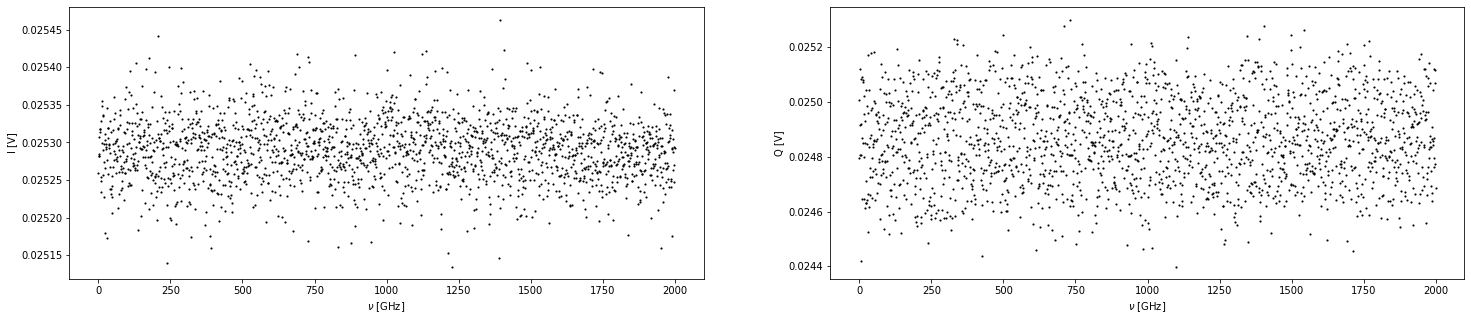

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(25,5))
axs[0].scatter(T, I, marker='.',s=5,color='black')
axs[0].set_xlabel(r'$\nu$ [GHz]')
axs[0].set_ylabel(r'I [V]')
axs[1].scatter(T, Q, marker='.',s=5,color='black')
axs[1].set_xlabel(r'$\nu$ [GHz]')
axs[1].set_ylabel(r'Q [V]')